In [ ]:
#here we test the discsampler

In [ ]:
%%time
'''
GOOD STUFF  lets test the discsampler
'''

import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline



import graphlearn.utils.draw as myutils
import graphlearn.discsampler as ds
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt


# hope this works.,.,. dont want to see warnings
import warnings
warnings.filterwarnings('ignore')


sampler=ds.discsampler()

#sampler.fit(gspan_to_eden( 'bursi.pos.gspan' ),  n_jobs=-1)
#sampler.save('tmp/demo.ge')
#print 'saved'
sampler.load('tmp/demo.ge')
graphs = gspan_to_eden( 'bursi.pos.gspan' )


graphs = itertools.islice(graphs,10)
graphs = sampler.sample( graphs,
               batch_size=1,
               n_jobs=5,
               n_steps=100,
               select_cip_max_tries = 100,
               annealing_factor = 1.0,
               queue_chunk_size = 5,
               radius = 0.15,
               create_n_samples = 30,
               sample_tries = 30
               )
myutils.draw_many_graphs(graphs)


In [17]:
print dir(history[0][0])
history.sum()

['A', 'A1', 'H', 'I', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_wrap__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__delslice__', '__dict__', '__div__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getslice__', '__gt__', '__hash__', '__hex__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__oct__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__rep

0.24947208554612943

# HERE BE NO DRAGONS


In [2]:
'''
inform me when done !
'''
import os
os.system("( speaker-test -t sine -f 2000 )& pid=$! ; sleep 5.0s ; kill -9 $pid")

0

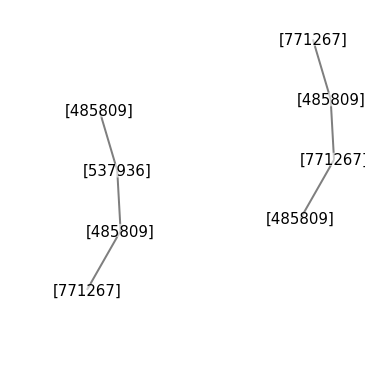

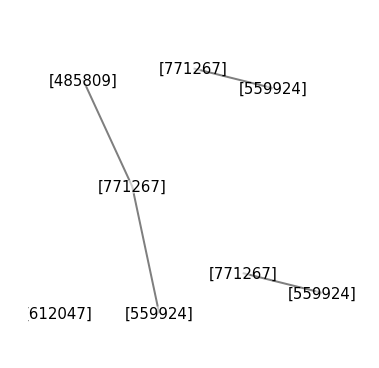

292642
292642


In [1]:
'''TESTING HASH THINGS THERE ARE COLLISIONS'''
import networkx as nx
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline

import graphlearn.utils.draw as dr

import graphlearn.utils.myeden as myed
import graphlearn.graphtools as gt

vectorizer=myed.GraphLearnVectorizer()


def get_graph(nodelabels):
    g= nx.Graph()
    for e in nodelabels:
        nodes=len(g)
        #add nodes
        g.add_nodes_from(range(nodes,nodes+len(e)))
        #add edges
        for edid in range(nodes,nodes+len(e)-1):
            g.add_edge(edid,edid+1)
        #add labels
        for i,name in enumerate(e):
            g.node[nodes+i]['label']=name
            
    vectorizer._label_preprocessing(g)
    return g
        
        
g= get_graph (['C1N1','1C1C'])
f= get_graph (['1C2','C2','C2','O'])
dr.display(g,vertex_label='hlabel')
dr.display(f,vertex_label='hlabel')

print gt.calc_interface_hash(g, 2**20-1)
print gt.calc_interface_hash(f, 2**20-1)
        
        







In [3]:
z = lambda x: x+=1 , print x


SyntaxError: invalid syntax (<ipython-input-3-952a5437fe59>, line 1)